In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
pf = pd.read_csv('properties_2016.csv')

C:\Users\X\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pf.head(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
pf.shape

(2985217, 58)

In [3]:
pf.rename(columns={'parcelid':'ParcelId'}, inplace=True)

In [5]:
dtrain= pd.read_csv('train_2016_v2.csv', parse_dates=["transactiondate"])

In [6]:
dtrain.rename(columns={'parcelid':'ParcelId'}, inplace=True)

In [8]:
print(dtrain.shape)

(90811, 3)


In [7]:
dtrain['transaction_month'] = dtrain['transactiondate'].dt.month
dtrain['transaction_day'] = dtrain['transactiondate'].dt.day

In [16]:
dtrain.drop(labels=['transactiondate'], axis=1, inplace=True)

In [8]:
dtrain= dtrain.merge(pf, on='ParcelId')

In [21]:
dtrain.to_csv('train_data.csv', index=False)

In [49]:
d_train = pd.DataFrame(dtrain['ParcelId'])

In [ ]:
d

In [50]:
d_train = d_train.merge(pf, on='ParcelId')

In [59]:
d_train.shape

(90811, 58)

In [53]:
d_train.columns

Index(['ParcelId', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [54]:
dtest = pd.read_csv('sample_submission.csv')

In [55]:
print(dtest.shape)
print(pf.shape)

(2985217, 7)
(2985217, 58)


In [56]:
d_test = pd.DataFrame(dtest['ParcelId'])


In [57]:
d_test = d_test.merge(pf, on='ParcelId')

In [58]:
print(d_test.shape)

(2985217, 58)


In [61]:
a = pd.DataFrame(d_train.columns.tolist(), columns=['feature_name'])
b = pd.DataFrame(d_train.isnull().sum().tolist(), columns=['train_missing'])
c = pd.DataFrame(d_train.dtypes.tolist(), columns=['type'])

In [62]:
nan_list = pd.concat([a,b,c], axis=1)

In [63]:
a = pd.DataFrame(d_test.columns.tolist(), columns=['feature_name'])
b = pd.DataFrame(d_test.isnull().sum().tolist(), columns=['test_missing'])
nan_list2 = pd.concat([a,b], axis=1)

In [64]:
nan_stat = nan_list.merge(nan_list2, on='feature_name')

In [66]:
nan_stat['train_missing_rate'] = nan_stat.train_missing/d_train.shape[0]
nan_stat['test_missing_rate'] = nan_stat.test_missing/d_test.shape[0]

In [67]:
nan_stat = nan_stat.sort_values('train_missing_rate', ascending=False)

In [69]:
nan_stat.index

Int64Index([ 6, 13, 41,  3, 46, 49,  2, 43, 16,  9, 28, 29, 30, 55, 56, 22, 45,
            14, 15, 10, 18, 42, 31, 27, 48,  1, 21, 20, 38, 23,  7, 34, 44, 26,
            12, 36, 19,  8, 47, 11, 57, 50, 39, 54, 51, 32, 53, 40,  4,  5, 52,
            17, 24, 25, 33, 35, 37,  0],
           dtype='int64')

In [87]:
nan_stat.head(20)

,feature_name,train_missing,type,test_missing,train_missing_rate,test_missing_rate
6,buildingclasstypeid,90795,float64,2972588,0.999824,0.995769
13,finishedsquarefeet13,90778,float64,2977545,0.999637,0.997430
41,storytypeid,90768,float64,2983593,0.999526,0.999456
3,basementsqft,90768,float64,2983589,0.999526,0.999455
46,yardbuildingsqft26,90716,float64,2982570,0.998954,0.999113
49,fireplaceflag,90589,object,2980054,0.997555,0.998270
2,architecturalstyletypeid,90550,float64,2979156,0.997126,0.997970
43,typeconstructiontypeid,90512,float64,2978470,0.996707,0.997740
16,finishedsquarefeet6,90390,float64,2963216,0.995364,0.992630
9,decktypeid,90153,float64,2968121,0.992754,0.994273


In [96]:
drop_features = nan_stat.feature_name.values[:18]

In [97]:
drop_features

array(['buildingclasstypeid', 'finishedsquarefeet13', 'storytypeid',
       'basementsqft', 'yardbuildingsqft26', 'fireplaceflag',
       'architecturalstyletypeid', 'typeconstructiontypeid',
       'finishedsquarefeet6', 'decktypeid', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'hashottuborspa', 'yardbuildingsqft17', 'finishedsquarefeet15'], dtype=object)

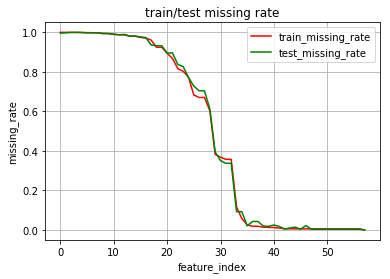

In [71]:
plt.figure()
x = np.arange(nan_stat.shape[0])
plt.plot(x, nan_stat.train_missing_rate, c='r', label='train_missing_rate')
plt.plot(x, nan_stat.test_missing_rate, c='green', label = 'test_missing_rate')
plt.xlabel('feature_index')
plt.ylabel('missing_rate')
plt.legend(loc='best')
plt.title('train/test missing rate')
plt.grid()
plt.show()

In [122]:
nan_stat['INDEX'] = 0

In [125]:
nan_stat['INDEX'] = np.arange(nan_stat.shape[0]) + 1

In [126]:
nan_stat

,feature_name,train_missing,type,test_missing,train_missing_rate,test_missing_rate,INDEX
6,buildingclasstypeid,90795,float64,2972588,0.999824,0.995769,1
13,finishedsquarefeet13,90778,float64,2977545,0.999637,0.997430,2
41,storytypeid,90768,float64,2983593,0.999526,0.999456,3
3,basementsqft,90768,float64,2983589,0.999526,0.999455,4
46,yardbuildingsqft26,90716,float64,2982570,0.998954,0.999113,5
49,fireplaceflag,90589,object,2980054,0.997555,0.998270,6
2,architecturalstyletypeid,90550,float64,2979156,0.997126,0.997970,7
43,typeconstructiontypeid,90512,float64,2978470,0.996707,0.997740,8
16,finishedsquarefeet6,90390,float64,2963216,0.995364,0.992630,9
9,decktypeid,90153,float64,2968121,0.992754,0.994273,10


In [99]:
d_train.drop(labels=drop_features, axis=1, inplace=True)
d_test.drop(labels=drop_features, axis=1, inplace=True)

In [100]:
trainsample = pd.DataFrame(d_train.isnull().sum(axis=1).tolist(), columns=['missing_feature'])
trainsample.sort_values(by='missing_feature', inplace=True)

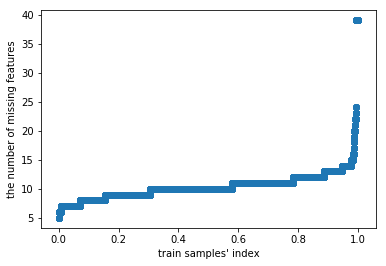

In [101]:
plt.figure(2)
x = np.arange(trainsample.shape[0])/trainsample.shape[0]
plt.scatter(x,trainsample.missing_feature)
plt.xlabel('train samples\' index')
plt.ylabel('the number of missing features')
plt.show()

In [102]:
testsample = pd.DataFrame(d_test.isnull().sum(axis=1).tolist(), columns=['missing_feature'])
testsample.sort_values(by='missing_feature', inplace=True)

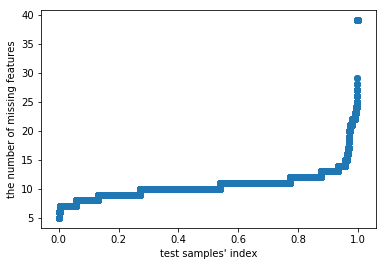

In [103]:
plt.figure(3)
x = np.arange(testsample.shape[0])/testsample.shape[0]
plt.scatter(x,testsample.missing_feature)
plt.xlabel('test samples\' index')
plt.ylabel('the number of missing features')
plt.show()

In [112]:
trainsample[trainsample.missing_feature>20].shape[0]/trainsample.shape[0]

0.010835691711356553

In [109]:
testsample[testsample.missing_feature>21].shape[0]/testsample.shape[0]

0.019676961507320907

In [118]:
nan_stat.index

Int64Index([ 6, 13, 41,  3, 46, 49,  2, 43, 16,  9, 28, 29, 30, 55, 56, 22, 45,
            14, 15, 10, 18, 42, 31, 27, 48,  1, 21, 20, 38, 23,  7, 34, 44, 26,
            12, 36, 19,  8, 47, 11, 57, 50, 39, 54, 51, 32, 53, 40,  4,  5, 52,
            17, 24, 25, 33, 35, 37,  0],
           dtype='int64')

In [127]:
d_train.finishedsquarefeet50.describe()

count    6856.000000
mean     1355.546674
std       673.703488
min        44.000000
25%       938.000000
50%      1248.000000
75%      1619.000000
max      8352.000000
Name: finishedsquarefeet50, dtype: float64

In [128]:
finishedsquarefeet_list = [x for x in d_train.columns if 'finishedsquarefeet' in x]

In [131]:
finishedsquarefeet_sample = d_train[finishedsquarefeet_list]
finishedsquarefeet_sample = finishedsquarefeet_sample.dropna()

In [133]:
d_train.airconditioningtypeid.value_counts()

1.0     26668
13.0     1833
5.0       215
11.0       63
9.0         1
3.0         1
Name: airconditioningtypeid, dtype: int64

In [147]:
explain = pd.read_excel('zillow_data_dictionary.xlsx')

In [148]:
explain.rename(columns={'Feature':'feature_name'}, inplace=True)

In [151]:
explain['feature_name'] = explain['feature_name'].apply(lambda x: x[1:-1])

In [153]:
explain = explain.merge(nan_stat[['feature_name','type','train_missing_rate']], on='feature_name')

In [157]:
explain.to_csv('explain.csv', index=False)

In [9]:
dt = dtrain

In [10]:
dt.taxamount.describe()

count     90269.000000
mean       5983.975927
std        6838.876956
min          49.080000
25%        2872.830000
50%        4542.750000
75%        6901.090000
max      321936.090000
Name: taxamount, dtype: float64

In [15]:
nan_stat = dt.isnull().sum()

In [39]:
dt['x'] = dt.longitude - dt.longitude.min()
dt['y'] = dt.latitude - dt.latitude.min()

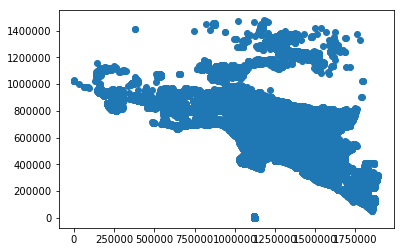

In [40]:
plt.scatter(dt.x, dt.y)
plt.show()

In [45]:
x = dt.loc[dt.transaction_month==1, 'x']
y = dt.loc[dt.transaction_month==1, 'y']

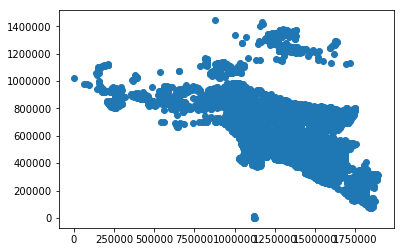

In [46]:
plt.scatter(x, y)
plt.show()

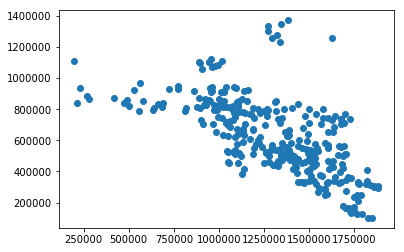

In [64]:
x = dt.loc[(dt.transaction_month==1) &(dt.transaction_day < 5), 'x']
y = dt.loc[(dt.transaction_month==1) &(dt.transaction_day < 5), 'y']
plt.scatter(x, y)
plt.show()

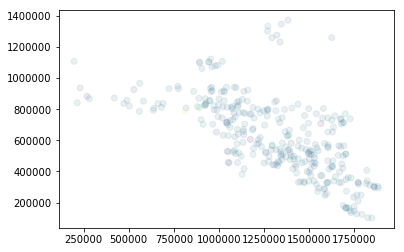

count    319.000000
mean       0.002840
std        0.124029
min       -0.636800
25%       -0.034100
50%        0.005000
75%        0.039700
max        1.083000
Name: logerror, dtype: float64


In [90]:
dh = dt.loc[(dt.transaction_month==1) &(dt.transaction_day < 5)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10, alpha=0.1)
plt.show()
print(dh.logerror.describe())

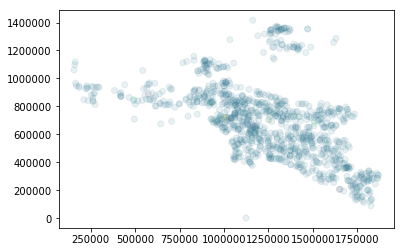

count    1070.000000
mean        0.026332
std         0.284601
min        -2.976000
25%        -0.022200
50%         0.011900
75%         0.047800
max         4.737000
Name: logerror, dtype: float64


In [89]:
dh = dt.loc[(dt.transaction_month==2) &(dt.transaction_day < 5)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10, alpha=0.1)
plt.show()
print(dh.logerror.describe())

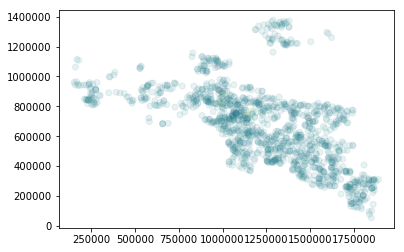

count    1349.000000
mean        0.015397
std         0.225062
min        -2.365000
25%        -0.025300
50%         0.007000
75%         0.041100
max         3.115000
Name: logerror, dtype: float64


In [86]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day < 5)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10, alpha=0.1)
plt.show()
print(dh.logerror.describe())

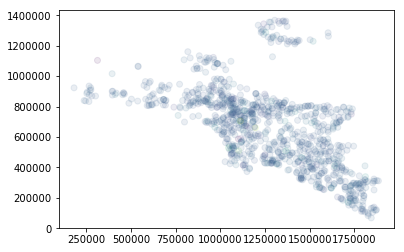

count    996.000000
mean       0.009512
std        0.142817
min       -0.767900
25%       -0.031750
50%        0.001000
75%        0.031500
max        1.815000
Name: logerror, dtype: float64


In [87]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >5) & (dt.transaction_day < 10)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.1)
plt.show()
print(dh.logerror.describe())

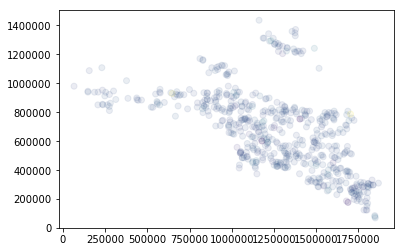

count    571.000000
mean       0.010574
std        0.178498
min       -0.839300
25%       -0.032500
50%        0.001000
75%        0.040200
max        2.330000
Name: logerror, dtype: float64


In [88]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >10) & (dt.transaction_day < 15)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.1)
plt.show()
print(dh.logerror.describe())

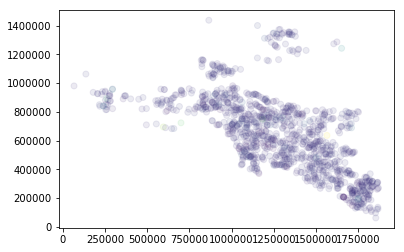

count    1196.000000
mean        0.013067
std         0.197631
min        -0.623600
25%        -0.032500
50%        -0.001000
75%         0.031500
max         2.987000
Name: logerror, dtype: float64


In [91]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >15) & (dt.transaction_day < 20)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.1)
plt.show()
print(dh.logerror.describe())

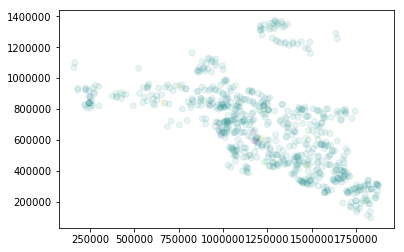

count    694.000000
mean       0.008792
std        0.162490
min       -1.273000
25%       -0.030500
50%        0.002000
75%        0.040200
max        1.314000
Name: logerror, dtype: float64


In [92]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >25) & (dt.transaction_day < 30)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.1)
plt.show()
print(dh.logerror.describe())

In [107]:
dtrain['label2'] = abs(dtrain.logerror)


In [124]:
dt = dtrain.loc[dtrain.label2>0.1]
ds = dtrain.loc[dtrain.label2<0.1]

In [112]:
shape

(1892941, 1476714)

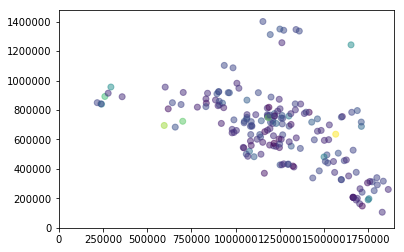

In [119]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >0) & (dt.transaction_day < 5)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.5)
plt.xlim(0, shape[0])
plt.ylim(0, shape[1])
plt.show()


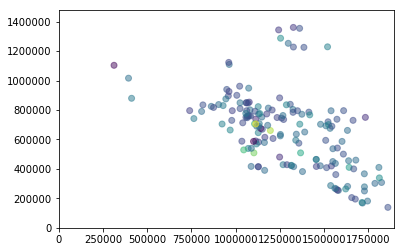

In [121]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >5) & (dt.transaction_day < 10)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.5)
plt.xlim(0, shape[0])
plt.ylim(0, shape[1])
plt.show()

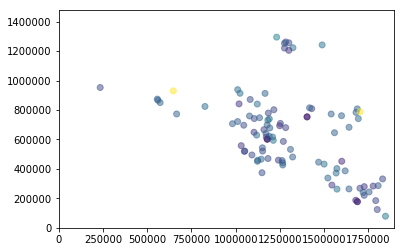

In [122]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >10) & (dt.transaction_day < 15)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.5)
plt.xlim(0, shape[0])
plt.ylim(0, shape[1])
plt.show()

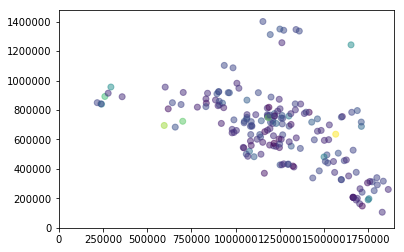

In [123]:
dh = dt.loc[(dt.transaction_month==3) &(dt.transaction_day >15) & (dt.transaction_day < 20)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.5)
plt.xlim(0, shape[0])
plt.ylim(0, shape[1])
plt.show()

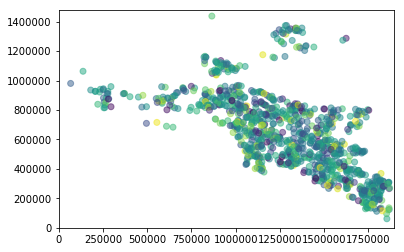

In [125]:
dh = ds.loc[(ds.transaction_month==3) &(ds.transaction_day >15) & (ds.transaction_day < 20)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.5)
plt.xlim(0, shape[0])
plt.ylim(0, shape[1])
plt.show()

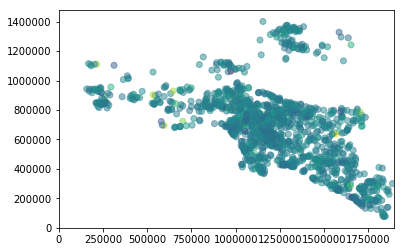

In [130]:
dh = dt.loc[(dt.transaction_month==3)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.5)
plt.xlim(0, shape[0])
plt.ylim(0, shape[1])
plt.show()

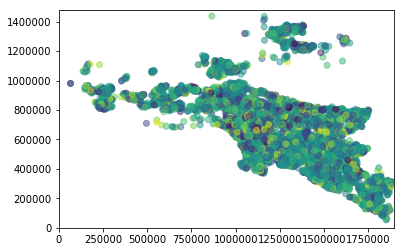

In [134]:
dh = ds.loc[(ds.transaction_month==3)]
plt.scatter(dh.x, dh.y, c=dh.logerror*10,alpha=0.5)
plt.xlim(0, shape[0])
plt.ylim(0, shape[1])
plt.show()

In [135]:
dh.count()

ParcelId                        7173
logerror                        7173
transactiondate                 7173
transaction_month               7173
transaction_day                 7173
airconditioningtypeid           2382
architecturalstyletypeid          31
basementsqft                       5
bathroomcnt                     7173
bedroomcnt                      7173
buildingclasstypeid                1
buildingqualitytypeid           4366
calculatedbathnbr               7057
decktypeid                        58
finishedfloor1squarefeet         579
calculatedfinishedsquarefeet    7097
finishedsquarefeet12            6858
finishedsquarefeet13               3
finishedsquarefeet15             207
finishedsquarefeet50             579
finishedsquarefeet6               29
fips                            7173
fireplacecnt                     833
fullbathcnt                     7057
garagecarcnt                    2570
garagetotalsqft                 2570
hashottuborspa                   199
h

In [138]:
np.log(1.1)

0.095310179804324935

In [150]:
dtrain['tax_ratio'] = dtrain.structuretaxvaluedollarcnt / dtrain.taxvaluedollarcnt

In [151]:
t = dtrain.loc[(dtrain.x==1002865.0)&(dtrain.y==645305.0)]

In [153]:
t.tax_ratio

1859     0.242315
2236     0.302316
4243     0.182068
7113     0.298932
7989     0.399446
8161     0.532362
8376     0.279926
8383     0.527109
8612     0.440000
9381     0.470080
12198    0.280532
13786    0.314815
23151    0.441344
27676    0.616925
27935    0.348621
29905    0.620736
31063    0.381667
33863    0.354200
34523    0.345000
35028    0.381874
35304    0.259257
36937    0.494429
37074    0.487243
39869    0.385826
40351    0.284314
40709    0.195399
41109    0.595626
47882    0.218180
49368    0.364947
50563    0.277058
52584    0.227962
55843    0.493308
57186    0.343137
58258    0.189189
59481    0.151515
61048    0.687275
64139    0.418461
64534    0.393809
66488    0.624843
71314    0.800001
80426    0.455184
81081    0.451599
82428    0.247885
85108    0.390000
89126    0.339533
89237    0.453761
89587    0.508300
89914    0.642858
Name: tax_ratio, dtype: float64

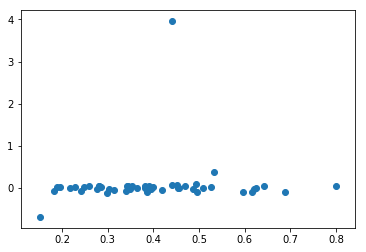

In [152]:
plt.scatter(t.tax_ratio, t.logerror)
plt.show()

In [149]:
dtrain.loc[(dtrain.x==1002865.0)&(dtrain.y==645305.0)].to_csv('shtet.csv', index=False)

In [141]:
(dtrain['x'].astype('str') + dtrain['y'].astype('str')).value_counts()

1002865.0645305.0     48
1597777.0326356.0     41
1720509.0239541.0     34
1597368.0328102.0     31
1713865.0263705.0     29
419901.0872000.0      29
1198865.0885805.0     24
1259865.0427005.0     23
1327865.0432305.0     23
1487355.0541832.0     22
886865.01071405.0     22
1824741.0307773.0     21
1851256.0252894.0     21
1372865.0445905.0     20
1135865.0723605.0     20
1061865.0640705.0     20
1484437.0544221.0     20
998865.0725205.0      20
1793865.0341805.0     19
1645770.0564436.0     19
1744865.0234905.0     19
1100865.0763605.0     18
956883.01059107.0     18
892212.01122313.0     18
1272973.01223014.0    18
1800992.0221565.0     17
1768865.0296705.0     17
1352865.0702205.0     17
930865.0830505.0      17
1755865.0215105.0     17
                      ..
1648503.0534922.0      1
1147292.0706389.0      1
877155.0814395.0       1
1463069.0595871.0      1
975791.0705547.0       1
1707680.0260018.0      1
421865.0873305.0       1
838994.0730069.0       1
1254241.0792440.0      1
